# Cahier de programme : Couplage Leds et Capteur de température.

## objectif : 

Réaliser un programme qui donne une indication sur la température avec un changement de couleur de led.

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import mraa, upm
import time

# LEDs pilotées par la broche 32 verte et la broche 33 rouge
ledgreen = mraa.Gpio(32)
ledred = mraa.Gpio(11)
# Broches positionnées en sortie
statusgreen = -1
statusred = -1
while statusgreen != 0 :
    statusgreen = ledgreen.dir(mraa.DIR_OUT)
print(statusgreen)
while statusred != 0 :
    statusred = ledred.dir(mraa.DIR_OUT)
print(statusred)

0
0


In [4]:
# Extinction des LEDs
ledgreen.write(0)
ledred.write(0)
print ("LED Verte allumée 5 secondes")
ledgreen.write(1)
time.sleep(5)
ledgreen.write(0)
print ("LED Rouge allumée 5 secondes")
ledred.write(1)
time.sleep(5)
print("LEDs éteintes")
ledred.write(0)

LED Verte allumée 5 secondes
LED Rouge allumée 5 secondes
LEDs éteintes


0

# Alerte dépassement de température

Ce programme vous permet d'allumer une led verte tant que la température est inférieure à 25 °C et une led rouge si la température dépasse 25 °C

Repérez les déclarations liées au GPIO qui pilote vos leds rouge et verte. La nomenclature des ports du GPIO a été choisie pour correspondre à ce qui est écrit sur le T-Cobbler plus.

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

print("Alerte rouge si la température dépasse 25 °C")
from upm import pyupm_mcp9808 as mcp
mcp = mcp.MCP9808(0)
#ledg = mraa.Gpio(32)
#ledr = mraa.Gpio(33)
# Broches positionnées en sortie
#ledg.dir(mraa.DIR_OUT)
#ledr.dir(mraa.DIR_OUT)
#bme.update()
nombremesures=int(input("Saisissez le nombre de mesures souhaitées : "))
cycle=0
pause=int(input("Saisissez l'intervalle entre 2 mesures en secondes : "))
while cycle < nombremesures:
    tempMCP = mcp.getTemp()
    if tempMCP < 25:
        ledgreen.write(1)
        ledred.write(0)
    else:
        ledgreen.write(0)
        ledred.write(1)
    manufacturer=mcp.getManufacturer()
    hysteresis=mcp.getHysteresis()
    print ("{0:.2f} °C".format(tempMCP)," ; ",end='')
    time.sleep(pause)
    cycle=cycle+1

#print(manufacturer," ; ",end='')
#print(hysteresis," ; ",end='')
ledgreen.write(0)
ledred.write(0)

Alerte rouge si la température dépasse 25 °C
Saisissez le nombre de mesures souhaitées : 30
Saisissez l'intervalle entre 2 mesures en secondes : 2
26.44 °C  ; 26.38 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.50 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.50 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.50 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.50 °C  ; 26.50 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 26.44 °C  ; 

0

# Un test sur mcp9808 avec affichage de la température mesurée graphiquement

On importe les librairies nécessaires puis on décide de choisir le nombre de mesure à effectuer et le délai entre deux mesures.

Cette version de détection de la température n'est pas couplée à une led mais à une indication sous forme de texte et un graphique est affiché à la fin des mesures. 

Saisissez le nombre de mesures souhaitées : 10
Saisissez l'intervalle entre 2 mesures en secondes : 1
Température en °C : 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 
26.3 °C  ; 


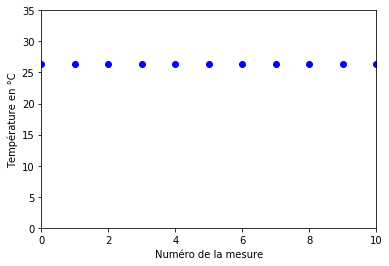

manufacturer =  84  ; hysteresis =  0.0  ; 

In [25]:
import mraa, upm
import time

from upm import pyupm_mcp9808 as mcp

mcp = mcp.MCP9808(0)
#bme.update()
nombremesures=int(input("Saisissez le nombre de mesures souhaitées : "))
cycle=0
valeurs=[0]*(nombremesures+1)
abscisse=[0]*(nombremesures+1)
pause=int(input("Saisissez l'intervalle entre 2 mesures en secondes : "))
print("Température en °C : ")
while cycle <= nombremesures:
    tempMCP = mcp.getTemp()
    valeurs[cycle]=tempMCP
    abscisse[cycle]=cycle
    manufacturer=mcp.getManufacturer()
    hysteresis=mcp.getHysteresis()
    print ("{0:.1f} °C".format(tempMCP)," ; ")
    time.sleep(pause)
    cycle=cycle+1
plt.plot(abscisse, valeurs, 'ro', color="blue")
plt.axis([0, nombremesures, 0, 35 ])
plt.xlabel("Numéro de la mesure")
plt.ylabel("Température en °C")
plt.show()
print("manufacturer = ",manufacturer," ; ",end='')
print("hysteresis = ",hysteresis," ; ",end='')